# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

**MESSAGE HEAD OF ANALYTICS: New Task from the Sales Team**

Hey!
I have **an analysis task for you from the sales team**. I think you will find it interesting, there is
lots of flexibility for you to try different methods. You can see the request in the email below.

I would like you **to perform the analysis and write a short report for me**. I don’t need to see
any code, but I do want to read your thinking and how you got to your conclusions.

I also want you **to prepare and deliver the presentation for the sales rep** - you are ready for
the challenge!

**MESSAGE SALES REP: Sales strategy?**

Hi,

Really hoping you could help me out with some analysis. This is quite short notice but I have
a meeting with the executive team to update them on sales approaches for the new
product line so I need this information as soon as possible.

We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.

I need to report to the executive team in 4 weeks. You need to present to me before then so
I understand what is going on and what we do next.

Look forward to seeing your presentation.

**Analysis Starts**
The file that is given to us is *product_sales.csv*. As we need to use this file, we are going to upload it using *pd.read_csv()* from the *pandas* package.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

product_sales = pd.read_csv("product_sales.csv")
product_sales

week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]

First considerations about cleaning the dataset:
The "years_as_customer" column should be from 1984 in advance, the values cannot be bigger than the current year minus the starting year of Pens and Printers. 
Let´s check that there aren´t bigger than the company time alive.

In [3]:
company_active = 2024 - 1984
non_sense_dates = product_sales[product_sales["years_as_customer"] > company_active]
non_sense_dates

week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]

We just replace them with the value 40 years in "years_as_customer" column.

In [5]:
product_sales["years_as_customer"] = product_sales["years_as_customer"].replace(63,40).replace(47,40)

2. See if the "customer_id" column is unique for each client, as it is specified in the *Practical document for Product Sales*

In [6]:
product_sales[product_sales.duplicated("customer_id")]

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []

As it return an empty result, all the identifiers are *unique*, so everything is okay in this column!

3. See if there are any missing values in any column.

In [7]:
product_sales.isna().any()

#We see that the only column which has missing values is the "revenue" column. Let´s see which is the percentage of missing values: Depending on the quantity, we will discard them or fill them.
print(product_sales["revenue"].isna().sum(),len(product_sales["revenue"]))
mis = product_sales["revenue"].isna().sum()
total = len(product_sales["revenue"])
print(f"The missing values represent: {(mis/total)*100}% so we need to fill them or we will miss lots of data.")

1074 15000
The missing values represent: 7.16% so we need to fill them or we will miss lots of data.


We need to input values in the NaN columns as it represents more than 5% of our dataset. Ths means, if we discard them, we are missing lots of information, therefore we should input a value rather than discarting.

We have two options: 

- OPTION 1: To input the values based on the "revenue" column with its mean or its median.

- OPTION 2: To input the mean/median of a new column, called "price_by_product", which is the result of dividing the columns "revenue" and "nb_sold", so later we can approximate with much more precision.

In case the price of the products differ a lot and we have really expensive and really cheap products, we will use the first option. In case that the revenue depends more of the quantity of the products, we will use the second option.

As a first look, this case is more probable as we are selling office products, which are products that do not have really different prices. The opposite happens, for example, in a car company, which cars can have enormous differences in their prices.
Nevertheless, this is a forecasting and not a decision. We should base it on our analysis.

**We will take option 2** as the correlation between "nb_sold" and "revenue" is quite big.This means that the products have similar prices but the revenue relies more on how many products the client has purchased.

OPTION 2: 
Using the price by product value, which we can create dividing by the "revenue" and "nb_sold" columns and using its mean or its median. Then, multiplying by the "nb_sold" column again to fill the NaN values in "revenue" column.

In [8]:
not_na_ps = product_sales.dropna()

#By product
not_na_ps["price_product"] = not_na_ps["revenue"]/not_na_ps["nb_sold"]
print("mean: ", not_na_ps["price_product"].mean(), "standard deviation: ",not_na_ps["price_product"].std())

#Again, as they have a considerable difference, we consider the median.
print("median: ",not_na_ps["price_product"].median())

mean:  9.099185917663567 standard deviation:  3.4518107609203255
median:  9.789


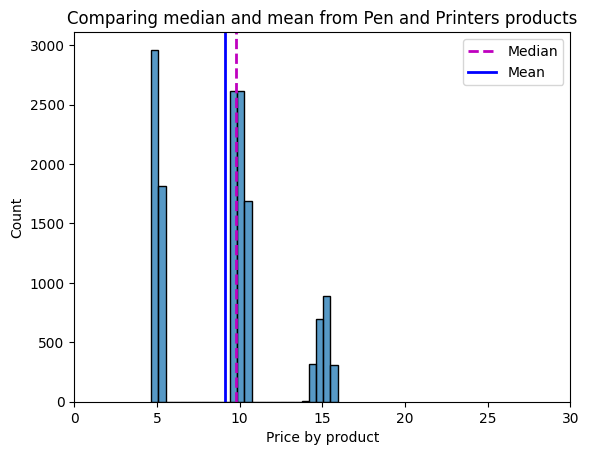

In [9]:
#As the difference is quite big between them, we will see them in a graphic compared to the median.
fig, ax = plt.subplots()
sns.histplot(not_na_ps["price_product"], ax = ax)

ax.set(xlabel="Price by product", xlim=(0,30), title="Comparing median and mean from Pen and Printers products")

median_product = not_na_ps["price_product"].median()
mean_product = not_na_ps["price_product"].mean()

#Vertical lines for the median and mean
ax.axvline(x=median_product, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean_product, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

As we have lots of extreme values is better to use the *median* of *price_by_product*, and then, multiplying by the number of products sold to make it more precise.

Lets input that revenues, and **add a new column with the prices for each product**, "price_product".

In [10]:
product_sales["price_product"] = not_na_ps["price_product"].copy()
product_sales["price_product"] = product_sales["price_product"].fillna(not_na_ps["price_product"].median())
product_sales["price_product"] = round(product_sales["price_product"],2)

We input the *price_product* and the number of units sold when the value in revenue column is *null*.

In [11]:
index=0
for elem in product_sales["revenue"]:
    if pd.isnull(elem):
        product_sales["revenue"][index] =product_sales["price_product"][index] * product_sales["nb_sold"][index]
        index +=1
    else:
        index +=1
product_sales["revenue"] = round(product_sales["revenue"],2)
product_sales

week  sales_method  ...          state  price_product
0         2         Email  ...        Arizona           9.79
1         6  Email + Call  ...         Kansas          15.03
2         5          Call  ...      Wisconsin           4.78
3         4         Email  ...        Indiana           9.79
4         3         Email  ...       Illinois          10.05
...     ...           ...  ...            ...            ...
14995     4          Call  ...   Pennsylvania           5.08
14996     5          Call  ...         Kansas           5.23
14997     1          Call  ...  West Virginia           4.98
14998     6          Call  ...     New Jersey           4.99
14999     5  Email + Call  ...       Illinois           9.79

[15000 rows x 9 columns]

This makes all the values pretty accurate, as the more products we have, the bigger the revenue it is, which increase our accuracy to maximums. Also, we have rounded our results to 2 decimal places as specified in the dataset information.

4. Look if there is any value that is not in our list of values in the "sales_method" column.

In [12]:
product_sales["sales_method"].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

The values we expected for this column were "Email", "Call" and "Email + Call". We have 2 additional values mispelled but can be easily corrected by replacing their values.

It´s clear that they have coherent values so we can associate "em + call" with "Email + Call" and "email" with "Email":

In [13]:
product_sales["sales_method"] = product_sales["sales_method"].replace('em + call',"Email + Call").replace('email',"Email")
product_sales["sales_method"].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

Now it has the three values grouped together.

5. Look if there is any value that is not in our list of values in the "states" column.

It is ok at it doesn´t appear values that are not states.

**Data validation:**
 The dataset contained 15000 rows and 8 columns before cleaning and validation. I have validated all the columns in the dataset with the following results:
 - week: Values from 1 to 6 with no missing value, so they all fit in the time the customer has been with the company. No cleaning is needed.
 - sales_method: There were five options due to mispelling. They were "Email","Call", "Email + Call", "em+call" and "email". The last values have been replaced with "Email + Call" and "Email". Now it has three options, which are "Email","Call" and "Email + Call" as the description specifies.
 - customer_id: It doesn´t have any duplicates and no missing values and all of them strings. No cleaning is needed.
 - nb_sold: It is numeric and doesn´t have any missing values, negative values neither. No cleaning is needed.
 - revenue: It has around 7,15% of its values missing and we should input them. As the quantity is bigger than the 5% we cannot discard the rows with missing values. 

We can do this by inputting the mean/median of the "revenue", or with the mean/median of each products value multiplied by its value in the "nb_sold" row. We use the last method as the correlation between the revenue and the quantity of products is really high. This means that the products have similar prices but the revenue relies more on how many products the client has purchased.

I have created a column "price_per_product" which will be the median or the mean of the product prices, and then I will multiply it by the "nb_sold" column to input the result in the NaN values of "revenue". I have picked the *median* as the "price_per_product" are right_skewed.

Doing this, there are no more *null* values and the cleaning of this column is finished.
- years_as_customer: I had to replace the values as they didn´t have any sense to be bigger than the company´s birth. I didn´t discard them because they were inside the IQR range.
- nb_site_visits: Between 12 and 41 and all of them numeric. No cleaning is needed.
- state: All of the 50 values are states for United States of America so they make perfect sense. No cleaning is required.
- price_product: We have obtained it by doing the "revenue" / "nb_sold", which gives us the price of the product. Then, the null values which are the values that do not have "revenue" are replaced with the *median*. This column could be helpful in advance.

After the data validation, the dataset contains 15000 rows with 9 columns without missing values.


----------------------------------------------------------------------------------------------------------

**QUESTIONS**

1.**How many customers where there for each type of approach?**

From our client list, the most popular sales method is **Email** with 7466 times used. After that we have the **call** method with 4962 values while in the last place we have the combination of both of them, "Email + Call" with 2572 values.

In [14]:
count_sales_method = product_sales.groupby("sales_method")["customer_id"].count().sort_values(ascending = False)
order_method = count_sales_method.index

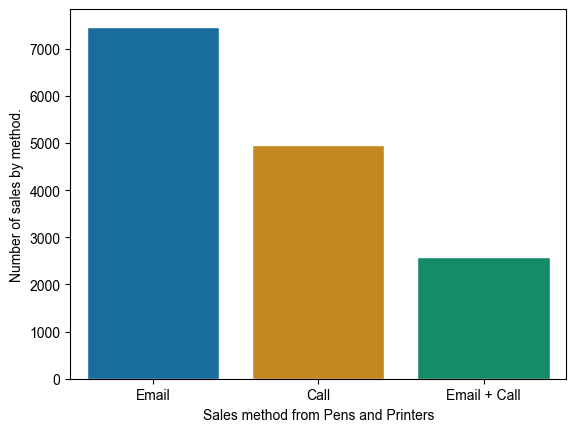

<Figure size 640x480 with 0 Axes>

In [15]:
fig, ax = plt.subplots()

sns.set_palette("colorblind")
sns.set_style("whitegrid")
sns.countplot(data = product_sales, x = "sales_method", palette="colorblind", order = order_method)
plt.xlabel("Sales method from Pens and Printers")
plt.ylabel("Number of sales by method.")

plt.show()
plt.clf()

So the most effective way to communicate to our clients is Email, as it is the one which has helped us to gain more clients. We would need to see if they spend the same.

2.**What does the spread of the revenue look like overall? And for each method?**

Lets provide some descriptive statistics, EDA and visualizations to understand better the spread of the revenue values.


In [16]:
product_sales["revenue"].describe()

count    15000.000000
mean        94.683539
std         46.081911
min         32.540000
25%         53.040000
50%         90.305000
75%        107.690000
max        238.320000
Name: revenue, dtype: float64

We have obtained the following information:
- All the values are present, as there are 15000 values for the "revenue" column.
- From all the values, the highest revenue is 238.32 dollar, whereas the lowest revenue is 32.54 dollars.
- The mean value of all revenues is 94.68 dollars, while the median is 90.30 dollars.

We can see this in the following graphic:

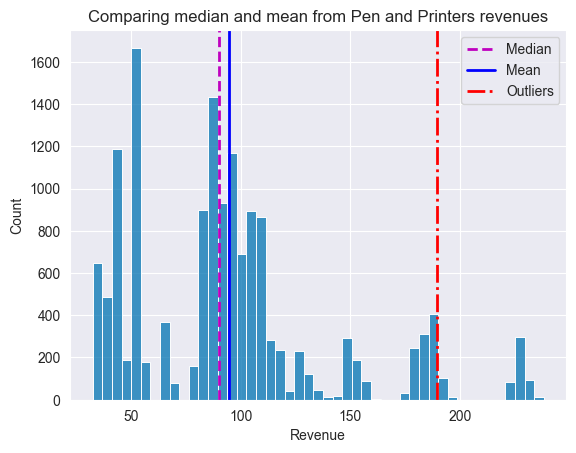

In [17]:
#REPRESENTATION OF THE REVENUE DISTRIBUTION
fig, ax = plt.subplots()
sns.histplot(product_sales["revenue"], ax = ax)

ax.set(xlabel="Revenue", title="Comparing median and mean from Pen and Printers revenues")

median_product = product_sales["revenue"].median()
mean_product = product_sales["revenue"].mean()

#Vertical lines for the median and mean
ax.axvline(x=median_product, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean_product, color='b', label='Mean', linestyle='-', linewidth=2)
ax.axvline(x=189.67, color='r', label='Outliers', linestyle='-.', linewidth=2)  #Calculated in the next cells.

# Show the legend and plot the data
ax.legend()
plt.show()

This histogram inform about how the revenues are distributed and they are right_skewed. We could suspect that before thanks to the mean being bigger than the median.

In fact, it has a really high variability. We can see this by calculating the mean and standard deviation:

In [18]:
print("Mean: ",product_sales["revenue"].mean())
print("Standard deviation: ",product_sales["revenue"].std())
print("Median: ",product_sales["revenue"].median())

Mean:  94.68353933333333
Standard deviation:  46.08191098910519
Median:  90.305


This opens the door for asking, since which value of the revenue would be considered an outlier? 
Thanks to the description of "revenue", we know that the values of the first quartile and thir quartile are:
- First quartile: 53.04
- Third quartile: 107.69

In [19]:
Q1_rev = 53.04
Q3_rev = 107.69

iqr_rev = Q3_rev - Q1_rev
low_b = Q1_rev - 1.5 * iqr_rev
upp_b = Q3_rev + 1.5 * iqr_rev

#Looking for outliers
outliers_rev = product_sales[(product_sales["revenue"] < low_b) | (product_sales["revenue"] > upp_b)]
outliers_rev_lim = outliers_rev["revenue"].min()
outliers_rev_lim

189.67

This means that everything over 189.66 dollars is an outlier, so the last part where we can find most of the values over 200 we can consider them as extreme values.

Lastly, we can consider the second question:

2.**What does the spread of the revenue look like for each method?**

We can see the spread for each method by comparing them in groups. 

In [20]:
product_sales.groupby("sales_method")["revenue"].describe()

count        mean        std  ...      50%       75%     max
sales_method                                 ...                           
Call          4962.0   49.339633  12.740944  ...   49.935   52.9775  137.06
Email         7466.0   97.047585  11.232873  ...   95.790  105.2975  148.97
Email + Call  2572.0  175.300373  34.970736  ...  182.135  189.5350  238.32

[3 rows x 8 columns]

We have obtained the following information:
- The number of values are:
    - 4962 values for the call method.
    - 7466 values for the Email method.
    - 2572 values for the Email + Call method.
- From the revenues, we have the following maximums and minimums:
    - 137.08 as the maximum and 32.54 as the minimum for the call method.
    - 148.97 as the maximum and 78.32 as the minimum for the Email method.
    - 238.32 as the maximum and 78.32 as the minimum for the Email + call method.
- We have the following means and medians:
    - We have a mean of 49.33 dollars and a median of 49.93 dollars for the call method.
    - We have a mean of 97.04 dollars and a median of 95.79 dollars for the Email method.
    - We have a mean of 175.30 dollars and a median of 182.13 dollars for the Email + call method.

We can see this in the following graphics:

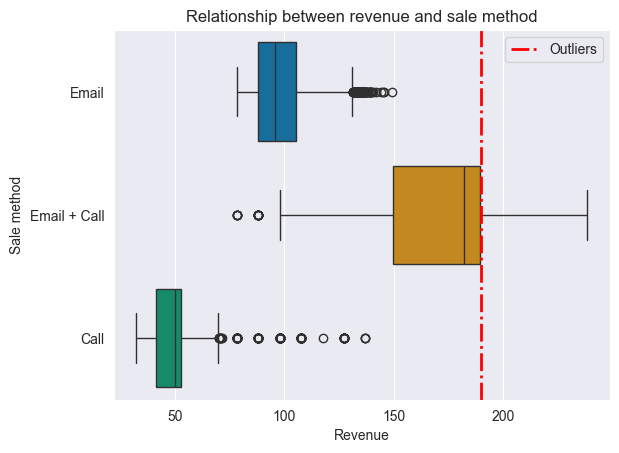

<Figure size 640x480 with 0 Axes>

In [21]:
sns.boxplot(data = product_sales, x = 'revenue', y = 'sales_method', order = ["Email","Email + Call","Call"],palette = 'colorblind')
plt.axvline(x=outliers_rev_lim, color='r', label='Outliers', linestyle='-.', linewidth=2)
plt.title("Relationship between revenue and sale method")
plt.xlabel('Revenue')
plt.ylabel('Sale method')
# Show the plot
plt.legend()
plt.show()
plt.clf()

We obtain from this that the outliers come from the "Email + Call" sale method so that means that is the one producing the biggest revenues!

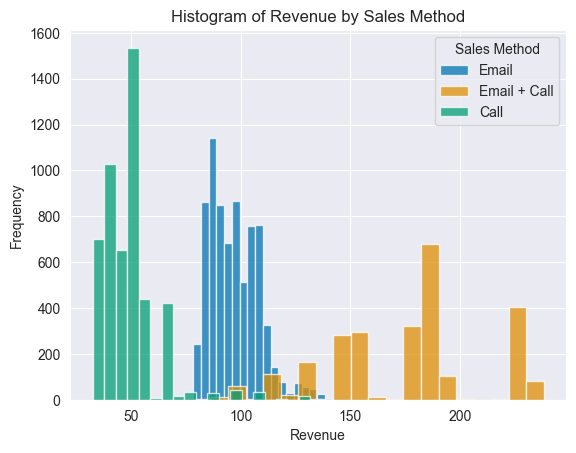

In [22]:
hist_methods_rev = []
for method in product_sales['sales_method'].unique():
    hist_methods_rev.append(product_sales[product_sales['sales_method'] == method]['revenue'])

colors = sns.color_palette("colorblind", n_colors=len(hist_methods_rev))
    
for i, method_data in enumerate(hist_methods_rev):
    plt.hist(method_data, bins=20, alpha=0.75, color=colors[i], label=product_sales['sales_method'].unique()[i])

# Agregar leyenda y etiquetas
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue by Sales Method')
plt.legend(title='Sales Method')

# Mostrar el gráfico
plt.show()

Another way of looking at it.

**3.Was there any difference in revenue over time for each of the methods?**

We can do a hypothesis tests to see if there is any difference over time between the different methods.

In [23]:
data_weekly_method_rev = product_sales.groupby(['week','sales_method'])["revenue"].sum().reset_index()
total_rev_method = product_sales.groupby('sales_method')["revenue"].sum()
total_rev_method

sales_method
Call            244823.26
Email           724557.27
Email + Call    450872.56
Name: revenue, dtype: float64

We obtain that the Email method is the one that has generated the biggest revenue between the three methods, followed by Email + Call and Call method.

As they are asking for revenue over time, we can use a **line plot** to find a comparison between methods.

In [24]:
data_weekly_method_rev

plt.figure(figsize = (10,6))
sns.relplot(data = data_weekly_method_rev, x = 'week', y = 'revenue',hue = 'sales_method',style = 'sales_method', kind = 'line',
           markers = True)
plt.title('Evolution of Sales methods over time.')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

We can imagine that there are significant differences over time: The Email method seems much more effective than the other two during the first two weeks, while the "Email + Call" method gains potential when the time passes.

**Lets do an Hypothesis tests to check if there are significant differences in revenues for each method!**

As we are comparing more than two categories, we will need to perform an ANOVA test:

**ANOVA test**
- H0: The revenue for every sales method are the same.
- H1: The revenue for some sales methods are different.

Significance level = 0.1

In [25]:
anova_result = pingouin.anova(data=data_weekly_method_rev, dv='revenue', between='sales_method')
anova_result

Source  ddof1  ddof2         F     p-unc       np2
0  sales_method      2     15  3.554265  0.054511  0.321529

We can say that there are relevant differences, but we don´t know between which groups.

In [26]:
pairwise_test_first_week = pingouin.pairwise_tests(data = data_weekly_method_rev,
                                                  dv = 'revenue',
                                                  between = 'sales_method',
                                                  padjust = 'bonf')

pairwise_test_first_week

Contrast      A             B  ...  p-adjust   BF10    hedges
0  sales_method   Call         Email  ...      bonf  2.768 -1.394458
1  sales_method   Call  Email + Call  ...      bonf  1.013 -0.863849
2  sales_method  Email  Email + Call  ...      bonf  0.753  0.665772

[3 rows x 13 columns]

The results makes us discard de *null hypothesis* for the H0 and we see that the difference between "Email" revenue and "Call" revenue are considered different.

This, together with the stronger "Email + Call" method as the weeks pass and their more profitable revenue, opens the possibility of discard the "Call" method as a sales method.

**4.Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.**

We saw in the email that we receive for the *New Product Sales Method* that the time we spend using each method is the following:
- **Email**: Requires little effort for the team and it is send twice, at the launch of the product and three weeks later.
- **Call**: The customers are called on average thirty minutes by our sales team members.
- **Email + Call**: First we send an Email at the launch of the product and then we call them during ten minutes the next week.

Since the revenue that we have obtained from the **Call** is the lowest from all of them, it spends around 30 minutes for each call and also is the one that needs more employees and more time involved, **is it not worth it to continue using it**.

Furthermore, this people that are using the **"Call"** method I would recommend **to switch that employees to the "Email"** method as it is currently the most effective way to obtain a customer.

Nevertheless, I would have an eye on the **"Email + Call** method to have a constant cash flow and see if it still effective in the future.

Delving deeper into the 'Email + Call' method will allow us to better manage surplus stock, enabling us to dispose of older units rather than just focusing on selling new products.

**FURTHER INFORMATION**

 I want to investigate a bit about how it is related the **"years_as_customer"** with the way they purchase and how much the client have spent on our products. Older clients have trusted us since the beginning so it could be a good metric to reinforce.

In [27]:
years_and_rev = sns.JointGrid(data = product_sales, x= 'years_as_customer', y = 'revenue')
years_and_rev.plot_joint(sns.kdeplot)
years_and_rev.plot_marginals(sns.kdeplot, shade = True)
plt.xlabel("Years as a customer from Pens and Printers")
plt.ylabel("Revenue")
plt.show()

In [28]:
sns.jointplot(data = product_sales, x = "years_as_customer", y = 'nb_sold', kind = 'hex')
plt.xlabel("Years as a customer from Pens and Printers")
plt.ylabel("Number of products purchased")
plt.show()

We see that the people that tend to purchase the most are customers that spend around 100 dollars and they purchase ten products. This are the kind of customers that belong to people that have been contacted through **Email** method as the mean value and the median of what they spend is around 95 dollars.

Also, most of them are people that have had really low experience as a customer so most of them are young entrepreneurs or are starting in the business world.

Another important metric could be the times they enter in our website, as most young people are familiarized with the computer world, so they should be more likely to look at our website:

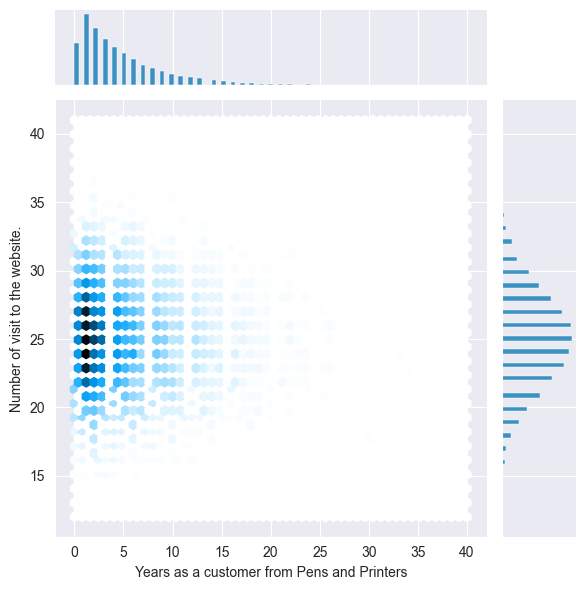

In [29]:
sns.jointplot(data = product_sales, x = "years_as_customer", y = 'nb_site_visits', kind = 'hex')
plt.xlabel("Years as a customer from Pens and Printers")
plt.ylabel("Number of visit to the website.")
plt.show()

This confirms our theory that **younger customers use more the online platform and tend to pay arround 100 dollars**.

**BUSINESS METRICS**

As our objective selling products to enable our customers to be more creative, focused
on tools for brainstorming, we cannot have any precise metrics about the products due to lack of information.

Nevertheless, as we see that the biggest density and our biggest sells are in the sector that tend to use **Email**, we can use both the **revenue of *Email* method** and **the number of visits to our website** as a couple of really good metrics.

Having in consideration that the revenue from the **Call** method during this lasts 6 months was around 244000 dollars and the **Email** method is around 724000 dollars, we expect to increase the revenue of the **Email** method at least the quantity of the **Call** method, so we expect around **968000 dollars for the next six months in the *Email* sale method**.

For the number of visits, as the number of customers through **Call** method was around 4900 people, and the number of visits are around 25 times for 7400 customers for the Email method, **we expect this variable to grow over 25 visits every 6 months per customer**.

**RECOMMENDATIONS**

After the meeting with the executive team, I would recommend to focus on the following steps:
- Data Collection for in-depth analysis:
    - New kind of data: Which kind of products are our clients purchasing? Are they products focused on brainstorming and creativity or standard and traditional products?
    - What about a new variable about the text written in the **Email** and perform some A/B testings?
    - What about how much time do our clients spend on our website?
    - Improve data quality: How much time are they spending on the phone for the "Email + Call" method? 
- Focusing on the **"Email"** method during the first three weeks and during the next three weeks using the **Email + Call** method to balance the cash flow.
- Selling packs of products of around 100 dollars or less to customers that are contacted through **Email**, while the most expensive products should remain for people that are contacted via **Email + Call**.
    - Important: See if the **Email** method works for people who tend spend around 50 dollars, as they have been contacted previously with **Call** method we should be aware of the reactions of the market.
- Create a marketing campaign with the target being young entrepreneurs / start-ups who are looking for products related to brainstorming in a digital environment.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation